# Understand the Uncertainty in CMIP6 Dataset

In this notebook we demonstrate how to calculate model uncertainty to see the different temperature trend shown among the 6 members of the ssp126 experiment of CNRM-CM6-1 model in CMIP6 archive:

* access data that include multiple ensemble members  
* make plots with multiple lines

This example uses Coupled Model Intercomparison Project (CMIP6) collections. For more information, please visit [data catalogue]( https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_2266_8675_3563) and [terms of use]( https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html).

---

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP, xarray, uncertainty
- Create Date: 2020-Apr
---

### Load libraries

In [19]:
import xarray as xr
import dask
%matplotlib inline

### Use xarray to open ensemble data files

In [4]:
Dir='/g/data/oi10/replicas/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1'
Files=[Dir+'/ssp126/r1i1p1f2/Amon/tas/gr/v20190219/tas_Amon_CNRM-CM6-1_ssp126_r1i1p1f2_gr_201501-210012.nc',
      Dir+'/ssp126/r2i1p1f2/Amon/tas/gr/v20190410/tas_Amon_CNRM-CM6-1_ssp126_r2i1p1f2_gr_201501-210012.nc',
      Dir+'/ssp126/r3i1p1f2/Amon/tas/gr/v20190410/tas_Amon_CNRM-CM6-1_ssp126_r3i1p1f2_gr_201501-210012.nc',
      Dir+'/ssp126/r4i1p1f2/Amon/tas/gr/v20190410/tas_Amon_CNRM-CM6-1_ssp126_r4i1p1f2_gr_201501-210012.nc',
      Dir+'/ssp126/r5i1p1f2/Amon/tas/gr/v20190410/tas_Amon_CNRM-CM6-1_ssp126_r5i1p1f2_gr_201501-210012.nc',
      Dir+'/ssp126/r6i1p1f2/Amon/tas/gr/v20190410/tas_Amon_CNRM-CM6-1_ssp126_r6i1p1f2_gr_201501-210012.nc']

ds1=xr.open_dataset(Files[0])
ds2=xr.open_dataset(Files[1])
ds3=xr.open_dataset(Files[2])
ds4=xr.open_dataset(Files[3])
ds5=xr.open_dataset(Files[4])
ds6=xr.open_dataset(Files[5])

In [3]:
ds1.tas

<xarray.DataArray 'tas' (time: 1032, lat: 128, lon: 256)>
[33816576 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 ...
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

### Concatenate ensemble files into one dataset

In [5]:
ds_new=xr.concat([ds1.tas, ds2.tas, ds3.tas, ds4.tas, ds5.tas, ds6.tas], 'new_dim')

Instead of reading each individual file and concatenating them, you can real them all in one dataset using an open multiple datasets function. The procedure above aims to demonstrate the concatenate function in Xarray.

In [14]:
ds_all=xr.open_mfdataset(''+Dir+'/ssp126/r*i1p1f2/Amon/tas/gr/*/tas_Amon_CNRM-CM6-1_ssp126_r*i1p1f2_gr_201501-210012.nc', concat_dim='member_id',combine='nested')
ds_all

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, member_id: 6, time: 1032)
Coordinates:
    height       float64 2.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: axis_nbounds, member_id
Data variables:
    time_bounds  (member_id, time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    tas          (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 128, 256), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-11-15T10:36:39Z
    description:            Future scenario with low radiative forcing by the...
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / Scen...
    activity_id:            ScenarioMIP
    contact:                contact.cmip@meteo.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.16
    experiment_id:          ssp126
    experiment:             update of RCP2.6 based on SSP1
    external_variables:     areacella
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS...
    grid:                   data regridded to a T127 gaussian grid (128x256 l...
    grid_label:             gr
    nominal_resolution:     250 km
    initialization_index:   1
    institution_id:         CNRM-CERFACS
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    license:                CMIP6 model data produced by CNRM-CERFACS is lice...
    mip_era:                CMIP6
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_activity_id:     CMIP
    parent_source_id:       CNRM-CM6-1
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f2
    branch_method:          standard
    branch_time_in_parent:  60265.0
    branch_time_in_child:   60265.0
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    references:             http://www.umr-cnrm.fr/cmip6/references
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    source_id:              CNRM-CM6-1
    source_type:            AOGCM
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               Amon
    variable_id:            tas
    variant_label:          r1i1p1f2
    EXPID:                  CNRM-CM6-1_ssp126_r1i1p1f2
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    history:                none
    tracking_id:            hdl:21.14100/05131cf0-ec69-4bfc-92f8-e1d40aae26f5

### Data analysis and plotting

There exists uncertainty in model simulations, which is the reason that we need multiple models and multiple ensembles.

In [15]:
ds_yr=ds_all.mean(dim=('lat','lon')).resample(time='Y').mean(dim='time') #annual average data
ds_yr

,Array,Chunk
Bytes,2.06 kB,4 B
Shape,"(86, 6)","(1, 1)"
Count,2616 Tasks,516 Chunks
Type,float32,numpy.ndarray


### Add ensemble mean to dataset as member_id: mean

In [21]:
ds_yr_ens_mean=ds_yr.mean(dim='member_id')
ds_yr_addMean=xr.concat([ds_yr, ds_yr_ens_mean],'member_id')
ds_yr_addMean=ds_yr_addMean.assign_coords({"member_id": [1,2,3,4,5,6,'mean'] }) #change coordinates of member_id
ds_yr_addMean

,Array,Chunk
Bytes,2.41 kB,4 B
Shape,"(86, 7)","(1, 1)"
Count,4164 Tasks,602 Chunks
Type,float32,numpy.ndarray


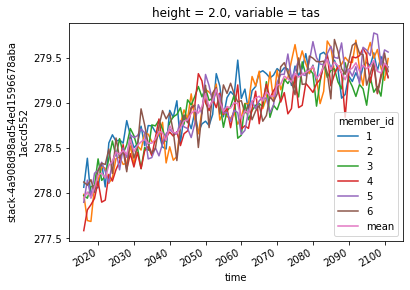

In [22]:
ds_yr_addMean=xr.Dataset.to_array(ds_yr_addMean)[0,:,:]
ds_yr_addMean.plot.line(x='time', hue='member_id')

### Now we measure the average distance of individual ensemble members to the ensemble mean

In [18]:
import numpy as np
dis=np.sqrt((np.square(ds_yr-ds_yr.mean(dim='member_id'))).mean(dim='time'))
dis.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (member_id: 6)
Coordinates:
    height   float64 2.0
Dimensions without coordinates: member_id
Data variables:
    tas      (member_id) float32 dask.array<chunksize=(1,), meta=np.ndarray>>

Now we can see that the uncertainty is around 0.15 degree Celsius.

### Summary

This example shows how to concatenate multiple ensemble files and plot them all together to get the sense of model uncertainty. We can see different simulation members show different results regarding the future temperature projection under scenario ssp126. 